In [2]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')



In [3]:
# read in df
df = pd.read_csv('amazon_product_reviews.csv', sep = ',')
print(df.head(5))

                     id             dateAdded           dateUpdated  \
0  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
1  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
2  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
3  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   
4  AVpgNzjwLJeJML43Kpxn  2015-10-30T08:59:32Z  2019-04-25T09:08:16Z   

                                                name                  asins  \
0  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
1  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
2  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
3  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   
4  AmazonBasics AAA Performance Alkaline Batterie...  B00QWO9P0O,B00LH3DMUO   

          brand                                         categories  \
0  Amazonbasics  AA,AAA,Heal

In [6]:
# get info on dataset
df.info()
df["reviews.text"].info()
print(f"Number of unique products {df['name'].nunique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [7]:
# create reviews df that only contains reviews column, remove any null values
review_df = df["reviews.text"]
print(f"number of null entries: {review_df.isnull().sum()}")
review_df.info()


number of null entries: 0
<class 'pandas.core.series.Series'>
RangeIndex: 28332 entries, 0 to 28331
Series name: reviews.text
Non-Null Count  Dtype 
--------------  ----- 
28332 non-null  object
dtypes: object(1)
memory usage: 221.5+ KB


In [8]:
# drop na
review_df_clean = review_df.dropna()
review_df_clean

0        I order 3 of them and one of the item is bad q...
1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: reviews.text, Length: 28332, dtype: object

In [7]:
review_df_clean[1]

'Bulk is always the less expensive way to go for products like these'

In [10]:
# make each review into a spacy doc

doc_list = []
for index, sentence in enumerate(review_df_clean):
    sentence = sentence.strip()
    sentence = sentence.lower()
    doc = nlp(sentence)
    doc_list.append(doc)


In [11]:
# check first 5 docs
for doc in doc_list[0:5]:
    print(doc)

i order 3 of them and one of the item is bad quality. is missing backup spring so i have to put a pcs of aluminum to make the battery work.
bulk is always the less expensive way to go for products like these
well they are not duracell but for the price i am happy.
seem to work as well as name brand batteries at a much better price
these batteries are very long lasting the price is great.


In [12]:
# tokenize each review
token_list = []
for doc in doc_list:
    tokenized_sentence = [token.text for token in doc if not token.is_punct | token.is_space | token.is_stop ]
    sentence_text = ' '.join(tokenized_sentence)
    tokenized_sentence_text = nlp(sentence_text)
    token_list.append(tokenized_sentence_text)

In [13]:
# check first 5 docs
for token in token_list[0:5]:
    print(token)

order 3 item bad quality missing backup spring pcs aluminum battery work
bulk expensive way products like
duracell price happy
work brand batteries better price
batteries long lasting price great


In [21]:
# test sentiment score 

# test_doc = token_list[0]
# print(test_doc)
for sentence in token_list[0:5]:
    sentiment = sentence._.blob.sentiment
    polarity = round(sentiment.polarity,2)
    subjectivity = round(sentiment.subjectivity,2)
    print(sentence)
    print(f"Polarity score: {polarity}")
    print(f"Subjectivity score: {subjectivity}")
    print()




order 3 item bad quality missing backup spring pcs aluminum battery work
Polarity score: -0.45
Subjectivity score: 0.36

bulk expensive way products like
Polarity score: -0.5
Subjectivity score: 0.7

duracell price happy
Polarity score: 0.8
Subjectivity score: 1.0

work brand batteries better price
Polarity score: 0.5
Subjectivity score: 0.5

batteries long lasting price great
Polarity score: 0.25
Subjectivity score: 0.38



In [19]:
# sentiment for all data
polarity_list = []
subjectivity_list = []
for sentence in token_list:
    sentiment = sentence._.blob.sentiment
    polarity = round(sentiment.polarity,2)
    subjectivity = round(sentiment.subjectivity,2)
    polarity_list.append(polarity)
    subjectivity_list.append(subjectivity)


    

In [20]:
# calculate sentiment for all reviews, store in a pandas df
data = pd.DataFrame( {'Review tokens' : token_list, 'Polarity': polarity_list, 'Subjectivity': subjectivity_list, })
data.tail(5)

,Review tokens,Polarity,Subjectivity
95,"(buy, amazonbasics, comes, batteries, long, la...",0.33,0.57
96,"(leappads, xbox, controllers, remotes, use, ba...",0.80,0.75
97,"(buy, batteries, great, long, lasting, batteries)",0.25,0.38
98,"(know, crazy, cheap, batteries, light, practic...",0.24,0.86
99,"(ps3, remote, control, television, remote, con...",0.00,0.20


<function matplotlib.pyplot.show(close=None, block=None)>

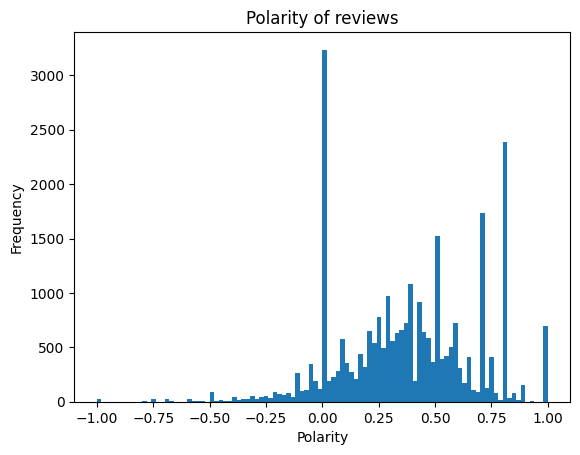

In [51]:
import matplotlib.pyplot as plt

plt.hist(data["Polarity"], bins = 100)
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Polarity of reviews')
plt.show   

<function matplotlib.pyplot.show(close=None, block=None)>

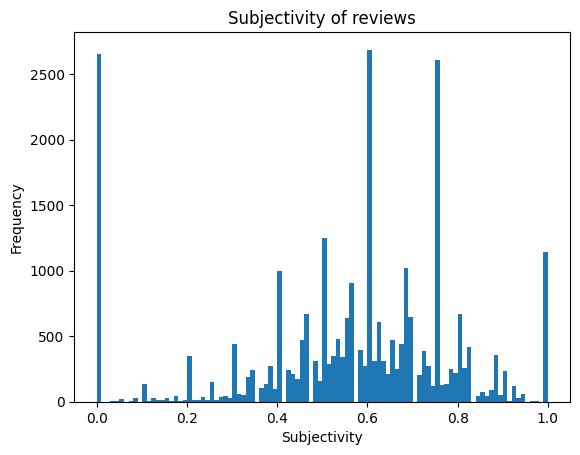

In [32]:
plt.hist(data["Subjectivity"], bins = 100)
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Subjectivity of reviews')
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

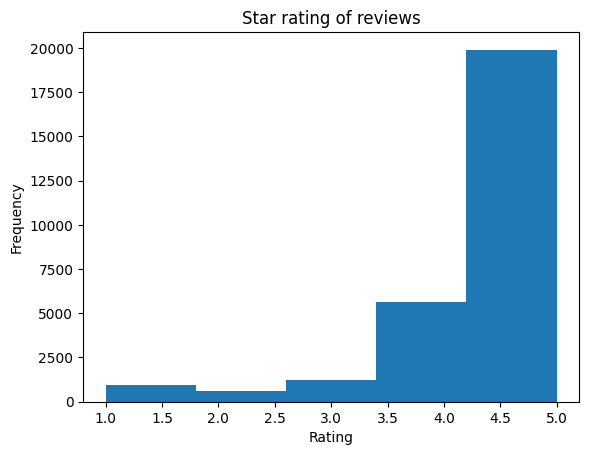

In [50]:
# review rating analysis
  
plt.hist(df["reviews.rating"], bins = 5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Star rating of reviews')
plt.show 